# Análise de Churn

## 🗂️ Descrição do Projeto

Este projeto é uma **Análise Descritiva e Diagnóstica** de *churn* de clientes de uma empresa de Telecomunicações, desenvolvida totalmente em **Python**.

A análise explora o **perfil dos clientes**, seus **gastos mensais**, o **tempo de permanência** e como o *churn* se distribui considerando **gênero** e **status de parceria**.

O objetivo é identificar **padrões e fatores que podem influenciar o cancelamento**, gerando **insights visuais claros** para apoiar estratégias de retenção de clientes.

## Importando os pacotes necessários

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

## Dicionário de Variáveis

| Variável           | Descrição                                               |
|--------------------|---------------------------------------------------------|
| `customerID`       | Identificador único do cliente                          |
| `gender`           | Gênero                                                   |
| `SeniorCitizen`    | Se o cliente é idoso (0 = não, 1 = sim)                 |
| `Partner`          | Se o cliente tem parceiro(a)                            |
| `Dependents`       | Se o cliente tem dependentes                            |
| `tenure`           | Tempo (em meses) que o cliente está na empresa          |
| `PhoneService`     | Se o cliente tem serviço de telefone                    |
| `MultipleLines`    | Se tem várias linhas telefônicas                        |
| `InternetService`  | Tipo de serviço de internet                             |
| `OnlineSecurity`   | Se possui segurança online                              |
| `OnlineBackup`     | Se possui backup online                                 |
| `DeviceProtection` | Se possui proteção para dispositivo                     |
| `TechSupport`      | Se possui suporte técnico                               |
| `StreamingTV`      | Se possui serviço de TV por streaming                   |
| `StreamingMovies`  | Se possui serviço de filmes por streaming               |
| `Contract`         | Tipo de contrato (mensal, 1 ano, 2 anos)                |
| `PaperlessBilling` | Se recebe fatura eletrônica                             |
| `PaymentMethod`    | Método de pagamento                                     |
| `MonthlyCharges`   | Valor mensal cobrado                                    |
| `TotalCharges`     | Valor total cobrado                                     |
| `Churn`            | Se o cliente cancelou (Yes/No)                          |

## Exploração Univariada

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# Visão geral dos tipos de dados e valores nulos
exploracao = pd.DataFrame({
    "Tipo": df.dtypes,
    "Nulos": df.isnull().sum(),
    "% Nulos": df.isnull().mean() * 100,
    "Valores Únicos" : df.nunique(),
    "Exemplo de Valores" : df.apply(lambda x: x.unique()[:3])
})
exploracao

,Tipo,Nulos,% Nulos,Valores Únicos,Exemplo de Valores
customerID,object,0,0.0,7043,"[7590-VHVEG, 5575-GNVDE, 3668-QPYBK]"
gender,object,0,0.0,2,"[Female, Male]"
SeniorCitizen,int64,0,0.0,2,"[0, 1]"
Partner,object,0,0.0,2,"[Yes, No]"
Dependents,object,0,0.0,2,"[No, Yes]"
tenure,int64,0,0.0,73,"[1, 34, 2]"
PhoneService,object,0,0.0,2,"[No, Yes]"
MultipleLines,object,0,0.0,3,"[No phone service, No, Yes]"
InternetService,object,0,0.0,3,"[DSL, Fiber optic, No]"
OnlineSecurity,object,0,0.0,3,"[No, Yes, No internet service]"


No resultado da tabela, podemos ver que não há problemas e não serão necessárias ações para a limpeza de dados
O dataset já se encontra pronto para análise

Agora vamos analisar as variáveis Univariadas

- gender, Partner, Dependents
- tenure, MonthlyCharges, TotalCharges

#### gender (Gênero)

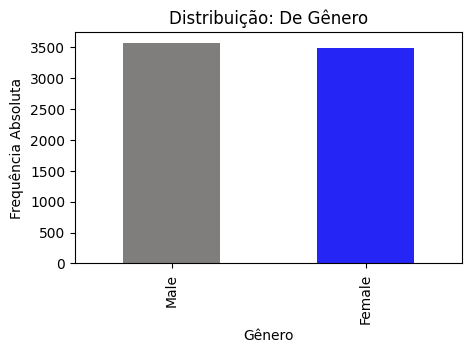

(gender
 Male      3555
 Female    3488
 Name: count, dtype: int64,
 gender
 Male      50.47565
 Female    49.52435
 Name: proportion, dtype: float64,
 array(['Female', 'Male'], dtype=object))

In [6]:
# Análise da coluna 'gender'

coluna = "gender"

# Valores únicos
valores_unicos = df[coluna].unique()

# Frequência absoluta e relativa
frequencia_absoluta = df[coluna].value_counts()
frequencia_relativa = df[coluna].value_counts(normalize=True) * 100

# Gráfico
plt.figure(figsize=(5,3))
frequencia_absoluta.plot(kind='bar', color=["#807D7D", "#2525F5"])
plt.title('Distribuição: De Gênero')
plt.xlabel('Gênero')
plt.ylabel('Frequência Absoluta')
plt.show()

frequencia_absoluta, frequencia_relativa, valores_unicos


A variável 'gender' é uma variável categórica.

Existem apenas duas variáveis distintas: "Female" e "Male".

Distribuição
- A distribuição está quase que praticamente equilibrada: Male 50,47 e Female 49.52
- Em relação a qualidade dos dados não há nada para ser ajustado.

Análise
- Grande oportunidade para-se verificar a proporção de gênero por churn, dessa forma podemos verificar se tem algum impacto em relação ao gênero

#### Partner (Parceiro)

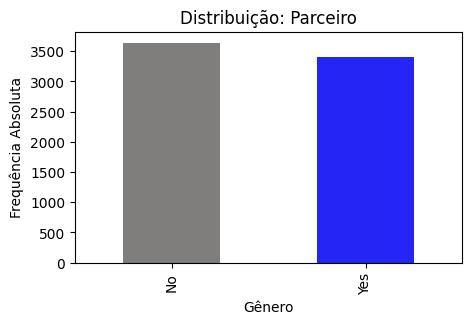

(Partner
 No     3641
 Yes    3402
 Name: count, dtype: int64,
 Partner
 No     51.69672
 Yes    48.30328
 Name: proportion, dtype: float64,
 2)

In [7]:
coluna = "Partner"

valores_unicos = df[coluna].nunique()
frequencia_absoluta = df[coluna].value_counts()
frequencia_relativa = df[coluna].value_counts(normalize=True) * 100

# Gráfico
plt.figure(figsize=(5, 3))
frequencia_absoluta.plot(kind='bar', color=["#807D7D", "#2525F5"])
plt.title('Distribuição: Parceiro')
plt.xlabel('Gênero')
plt.ylabel('Frequência Absoluta')
plt.show()

frequencia_absoluta, frequencia_relativa, valores_unicos

A variável 'Partner' é uma variável categórica.

Existem apenas duas variáveis distintas: "Yes" e "No".

Distribuição
- A distribuição está quase que praticamente equilibrada também: Yes 48,30 e No 51.69

Análise
- Podemos analisar se ter algum parceiro/relacionamento influência no aumento de churn(cancelamento), diminuição ou se não existe nenhuma influência

#### Dependents (Dependentes)

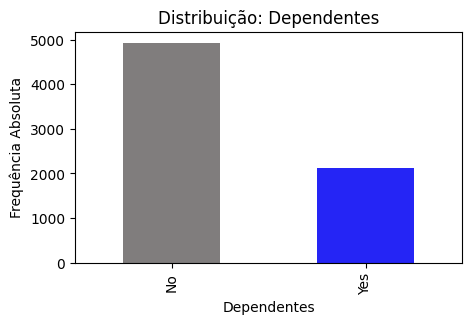

(Dependents
 No     4933
 Yes    2110
 Name: count, dtype: int64,
 Dependents
 No     70.041176
 Yes    29.958824
 Name: proportion, dtype: float64,
 2)

In [8]:
coluna = "Dependents"

# Valores únicos
valores_unicos = df[coluna].nunique()

frequencia_absoluta = df[coluna].value_counts()
frequencia_relativa = df[coluna].value_counts(normalize=True) * 100

plt.figure(figsize=(5, 3))
frequencia_absoluta.plot(kind='bar', color=["#807D7D", "#2525F5"])
plt.title("Distribuição: Dependentes")
plt.xlabel("Dependentes")
plt.ylabel("Frequência Absoluta")
plt.show()

frequencia_absoluta, frequencia_relativa, valores_unicos

A variável Dependents é uma variável categórica.
Existem apenas duas variáveis distintas: "Yes" e "No"

Distribuição
- A distribuição já é desproporcional com "70%" Dos clientes não possuindo dependentes e 30% Possuindo Dependentes

Análise
- Podemos analisar se a variável e essa resultado desproporcional influencia ou não no aumento de churn ou se não tem relevência no aumento ou queda de churn

#### Tenure (Meses que o cliente está na empresa)

Top 10 Meses Com Maior Frequência
tenure
1     613
72    362
2     238
3     200
4     176
71    170
5     133
7     131
8     123
70    119
Name: count, dtype: int64


(73,
 count    7043.000000
 mean       32.371149
 std        24.559481
 min         0.000000
 25%         9.000000
 50%        29.000000
 75%        55.000000
 max        72.000000
 Name: tenure, dtype: float64)

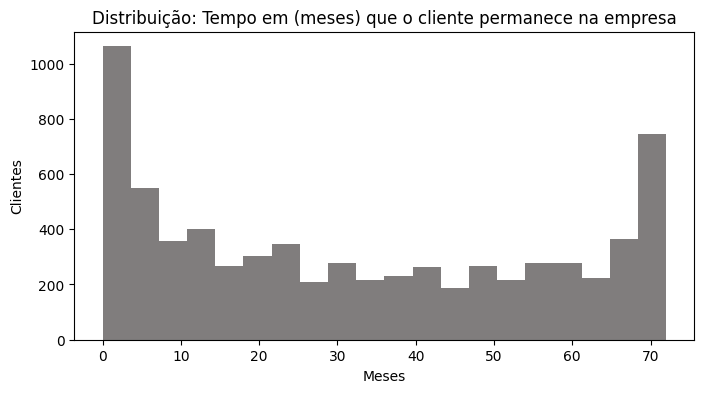

In [9]:
meses = 'tenure'

valores_unicos = df[meses].nunique()
descritivo = df[meses].describe()


# Frequência dos meses mais comuns Top (10)
top_10meses = df[meses].value_counts().head(10)
print('Top 10 Meses Com Maior Frequência')
print(top_10meses)

# Histograma para verificas a distribuição/Concentração
plt.figure(figsize=(8, 4))
plt.hist(df[meses], bins=20, color='#807D7D')
plt.title('Distribuição: Tempo em (meses) que o cliente permanece na empresa')
plt.xlabel('Meses')
plt.ylabel('Clientes')


valores_unicos, descritivo

A variável **Tenure** representa o **tempo em meses que o cliente permanece na empresa é registrada como discreta numérica.**

Podemos notar que os meses iniciam no mês 0, primerio mês que o cliente acabou de adquirir ou contratar o serviço, até o mês 70 que equivale a 5 anos e 8 meses. o que significa que o cliente mais antigo está na base há **cerca de 5 anos e 8 meses**. 

Não foi detectado Outliers 

Podemos ver também que os meses com maior frequência se localiza nós primeiros meses com clientes recém chegados ou clientes mais fiéis que permaneceram com o serviço

Distribuição
- A média é de **aproximadamente 32 meses, mediana de 29 meses, com um desvio padrão alto de 24.55** 
- significando que os dados estão muito dispersos em relação a média, **nota-se que o gráfico demonstra isso com uma maior concentração de cliente nas extremidades**, significa que a permanência dos clientes se encontram dispersos da média, centro, com um tempo de permanência de metade dos clientes com **2 anos e 6 meses**.

Análise
- Essa variabilidade sugere **grupos de clientes recém chegados até clientes mais fiéis**. O que pode ser interessante para verificar algum padrão de churn



#### MonthlyCharges (Valor Mensal Cobrado)

(1585,
 count    7043.000000
 mean       64.761692
 std        30.090047
 min        18.250000
 25%        35.500000
 50%        70.350000
 75%        89.850000
 max       118.750000
 Name: MonthlyCharges, dtype: float64)

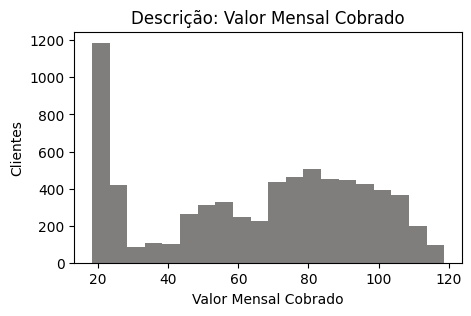

In [10]:
coluna = 'MonthlyCharges'

valores_unicos = df[coluna].nunique()
descricao = df[coluna].describe()

plt.figure(figsize=(5, 3))
plt.title('Descrição: Valor Mensal Cobrado')
plt.xlabel('Valor Mensal Cobrado')
plt.ylabel('Clientes')
plt.hist(df[coluna], bins=20, color=['#807D7D'])

valores_unicos, descricao

A variável MonthlyCharges representa **o valor mensal cobrado, é registrado como variável numérica contínua**

Não foi detectado Outliers em relação a algum valor discrepante.

E não foi detectado algum valor nulo ou valor ausente

Distribuição
- A média é de **64.76 valor cobrado por mês** , mediana de 70,35 e desvio padrão de 30 indicando uma dispersão de valor cobrado, **com metadeos clientes sendo cobrado o valor menor que 70,25**
- Histograma demonstra uma alta concentração no início, **indicando que uma alta quantidade de clientes paga um menor valor por mês** e uma cauda para a direita com cobranças mais altas.

Análise
- Podemos verificar se MonthlyCharges é relevante pro churn



#### TotalCharges (Valor Total Cobrado)

In [11]:
# Convertendo TotalCharges para numérico, transformando strings inválidas em NaN

df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')
df["TotalCharges"].dtypes

dtype('float64')

In [12]:
# Verificando se há valores nulos
# 11 Valores Nulos
df["TotalCharges"].isnull().sum()

np.int64(11)

In [13]:
# Dropar as linhas com NaN em TotalCharges
df = df.dropna(subset=['TotalCharges'])

(6530,
 count    7032.000000
 mean     2283.300441
 std      2266.771362
 min        18.800000
 25%       401.450000
 50%      1397.475000
 75%      3794.737500
 max      8684.800000
 Name: TotalCharges, dtype: float64)

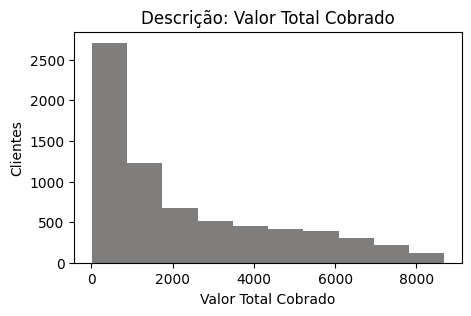

In [14]:
coluna = "TotalCharges"

valores_unicos = df[coluna].nunique()
descricao = df[coluna].describe()

plt.figure(figsize=(5, 3))
plt.title("Descrição: Valor Total Cobrado")
plt.xlabel("Valor Total Cobrado")
plt.ylabel("Clientes")
plt.hist(df[coluna], color=["#807D7D"])

valores_unicos, descricao

A variável **TotalCharges é uma variável do tipo discreta contínua**

Não foi detectado Outliers

Variável lida como texto por engano, após a conversão de tipo de dado **object** para **float** apareceu 11 valores nulos, no entanto esses valores/registros ausentes não impactam na análise de churn, nesse caso remover foi totalmente seguro. 

Distribuição    
- A média é de **2.283,30, com mediana em R$ 1.397,47, indicando que metade dos clientes pagaram até esse valor ao longo do contrato** .

- O desvio padrão é 2.266,77, mostrando alta dispersão dos valores totais.

- O histograma exibe uma distribuição assimétrica à direita (cauda longa), com grande concentração de clientes pagando até 
1.000,00 e poucos clientes com valores totais mais elevados.

Análise
- Verificar se há uma correlação entre Tenure e MonthlyCharges porque pode refletir quanto tempo o cliente permaneceu
e quanto pagava por mês

#### Churn

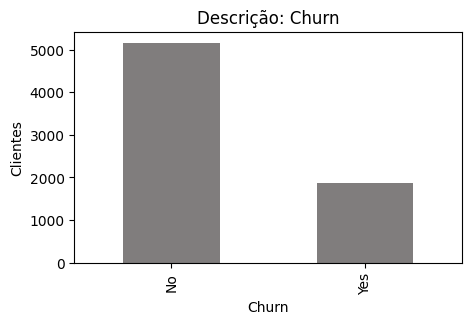

(2,
 Churn
 No     5163
 Yes    1869
 Name: count, dtype: int64,
 Churn
 No     73.421502
 Yes    26.578498
 Name: proportion, dtype: float64)

In [15]:
coluna = "Churn"

valores_unicos = df[coluna].nunique()
frequencia_absoluta = df[coluna].value_counts()
frequencia_relativa = df[coluna].value_counts(normalize=True) * 100

plt.figure(figsize=(5, 3))
plt.title("Descrição: Churn")
frequencia_absoluta.plot(kind='bar', color=['#807D7D'])
plt.xlabel("Churn")
plt.ylabel("Clientes")
plt.show()

valores_unicos, frequencia_absoluta, frequencia_relativa

Churn indica se o **cliente cancelou (Yes) ou manteve (No) o serviço.**

A variável é qualitativa nominal e não possui valores ausentes.

Distribuição
- 73,42% dos clientes permaneceram com o serviço (No), enquanto 26,58% cancelaram (Yes).

- Isso significa que 1 em cada 4 clientes, em média, realiza o cancelamento, reforçando a importância de entender os fatores que influenciam o churn.

- O gráfico de barras demonstra claramente essa distribuição desbalanceada

Análise
- A variável Churn é a variável alvo deste projeto — todos os cruzamentos exploratórios buscam entender quem são os clientes que cancelam, por que cancelam e quais características estão mais associadas a esse comportamento.

## Análise Multivariada

#### Análise Churn x MonthlyCharges **(Valor Mensal Cobrado)**

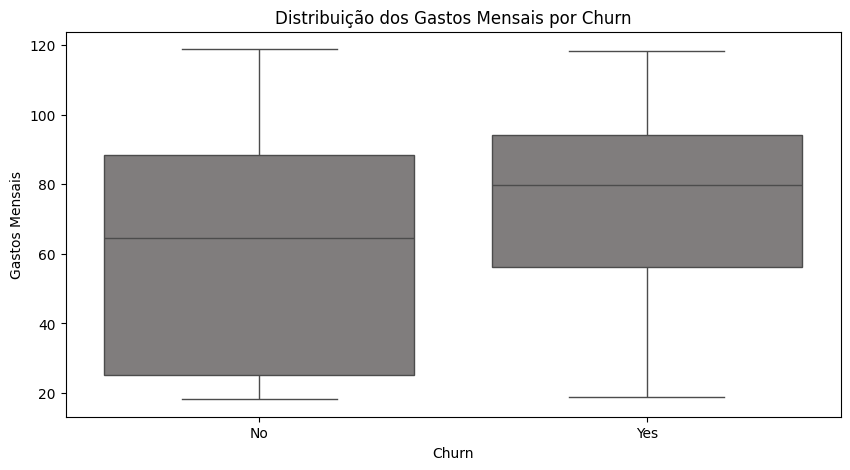

,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
No,5163.0,61.307408,31.094557,18.25,25.10,64.45,88.475,118.75
Yes,1869.0,74.441332,24.666053,18.85,56.15,79.65,94.200,118.35


In [16]:
plt.figure(figsize=(10, 5))

sns.boxplot(x='Churn', y='MonthlyCharges', data=df, color="#807D7D");

plt.title("Distribuição dos Gastos Mensais por Churn")
plt.xlabel('Churn')
plt.ylabel('Gastos Mensais')
plt.show()

df.groupby('Churn')['MonthlyCharges'].describe()

O gasto mínimo e máximo entre clientes que cancelaram (Churn = Yes) e os que mantiveram o serviço (Churn = No) são praticamente iguais, indicando que valores extremos de cobrança não são determinantes para o churn.

a média e a mediana dos gastos mensais dos clientes que cancelaram são claramente maiores:

- **Média dos que cancelaram: 74,44**

- **Mediana dos que cancelaram: 79,65**

- Média dos que não cancelaram: 61,30

- Mediana dos que não cancelaram: 64,45

**Monitorar Clientes com cobranças acima da média pode ser interessante/útil para prevenir cancelamentos**

#### Análise Churn x Tenure **(Tempo de Permanência)**

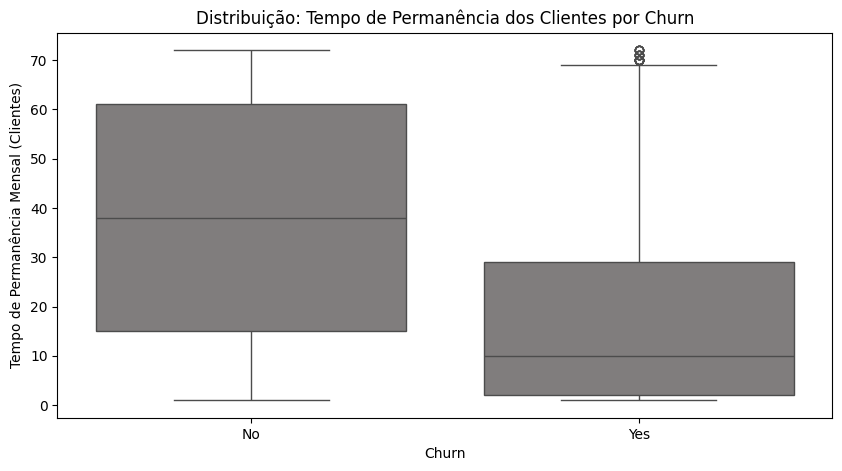

,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
No,5163.0,37.650010,24.076940,1.0,15.0,38.0,61.0,72.0
Yes,1869.0,17.979133,19.531123,1.0,2.0,10.0,29.0,72.0


In [17]:
plt.figure(figsize=(10, 5))

sns.boxplot(x='Churn', y='tenure', data=df, color="#807D7D");
plt.title('Distribuição: Tempo de Permanência dos Clientes por Churn')
plt.xlabel('Churn')
plt.ylabel('Tempo de Permanência Mensal (Clientes)')
plt.show()

df.groupby('Churn')['tenure'].describe()

O tempo de permanência (tenure) é significativamente diferente entre os clientes que cancelaram e os que mantiveram no serviço

Clientes que **cancelaram (Churn = Yes) têm um tempo médio de permanência menor (17,97 meses)** em comparação com clientes que permaneceram (Churn = No), que ficam em média 37,65 meses.

Limite e Mínimo ambos permanecem iguais.

A mediana:

- Mediana dos que cancelaram: **10 meses**

- Mediana dos que ficaram: 38 meses

Uma chamada de atenção para **percentil 25%** apresenta
- 25% dos que cancelaram, **cancelam em até 2 meses**
- Enquanto clientes que permanecem com o serviço, **permanecem por mais de 15 meses**

**Clientes que acabaram de assinar o serviço cancelam**

**Ação para retenção dos clientes com poucos meses de assinatura ou engajamento nos primeiros meses com oferta ou acompanhamento**

#### Análise Churn x Gênero

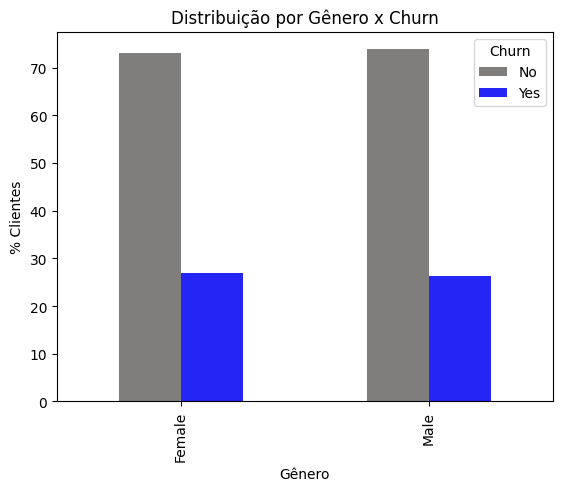

Churn,No,Yes
gender,,
Female,73.040482,26.959518
Male,73.795435,26.204565


In [18]:
cruzamento = pd.crosstab(df['gender'], df['Churn'], normalize='index') * 100

cruzamento.plot(kind='bar', color=["#807D7D", "#2525F5"])
plt.title("Distribuição por Gênero x Churn")
plt.xlabel("Gênero")
plt.ylabel("% Clientes")
plt.show()
cruzamento

Não há uma diferença desproporcional entre cancelamento (Churn) do gênero masculino x Feminino


#### Análise Churn x Partner (Parceiro) X Gender (Parceiro)

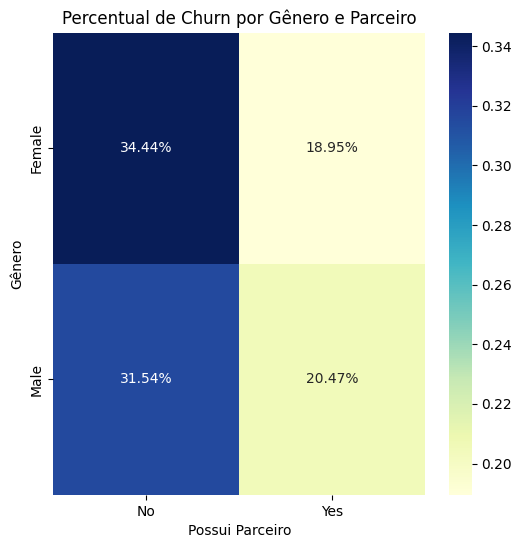

In [19]:
base = df[['gender', 'Churn', 'Partner']]

heatmap_data = (
    base.groupby(['gender', 'Partner'])['Churn'].value_counts(normalize=True)
    .rename('Percentual')
    .reset_index()
)

heatmap_yes = heatmap_data[heatmap_data['Churn'] == 'Yes']

heatmap_pivot = heatmap_yes.pivot(index='gender', columns='Partner', values='Percentual')

plt.figure(figsize=(6,6))
sns.heatmap(heatmap_pivot, 
    annot=True, 
    fmt=".2%", 
    cmap='YlGnBu')

plt.title('Percentual de Churn por Gênero e Parceiro')
plt.ylabel('Gênero')
plt.xlabel('Possui Parceiro')
plt.show()

Independente do gênero Homem ou Mulher, fica evidente que cliente que não possuem parceiro existem maior porcentagem de Churn

**Indica que pessoas solteiras tendem a cancelar o serviço com mais facilidade**

#### Correlação entre variáveis numéricas

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.246862,0.825880
MonthlyCharges,0.246862,1.000000,0.651065
TotalCharges,0.825880,0.651065,1.000000


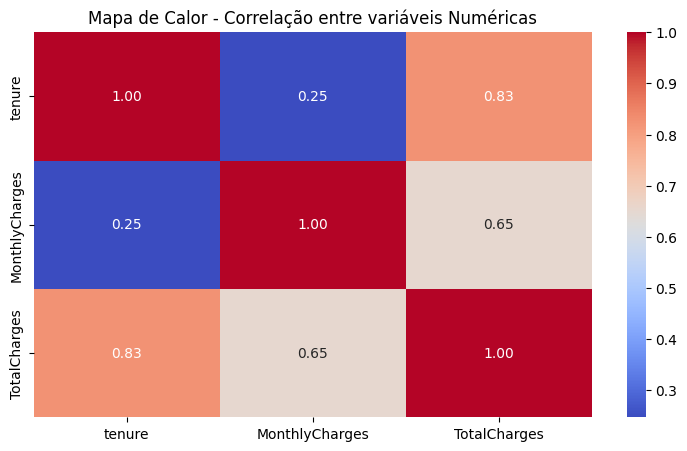

In [42]:
colunas = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Matriz dede correlação
correlacao = df[colunas].corr()

plt.figure(figsize=(9,5))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Calor - Correlação entre variáveis Numéricas')
plt.show;
correlacao

**Tempo em Meses x Valor Total Cobrado** 
- Como é possível ver existe uma **correlação forte positiva** entre a variável Valor Total Cobrado (TotalCharges) com Tempo em Meses(Tenure). **(0.83)**

- Isso significa quando maior tempo de permanência do cliente pode ser maior o Valor Total Cobrado

**Valor Total Cobrado x Valor Mensal Cobrado**
- Correlação Moderada Positiva **(0.65)**
- Isso significa que clientes com maiores valores de mensalidade tendem a ter um maior valor total cobrado

**Tempo em Meses x Valor Mensal Cobrado**
- Correlação baixa **(0.25)**
- Ou seja, plano do cliente não tem relação direta com o valor mensal cobrado

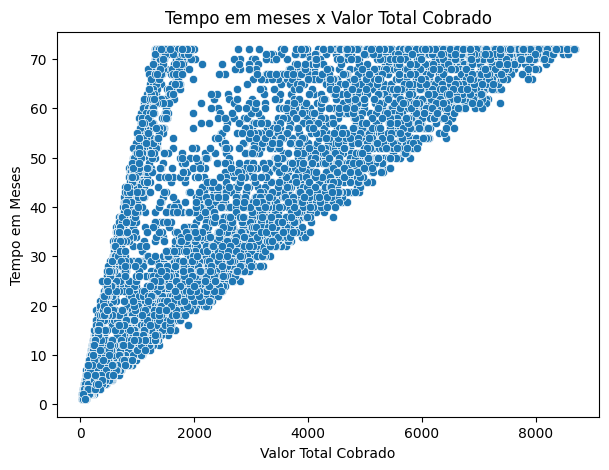

In [43]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='TotalCharges', y='tenure', data=df[colunas])
plt.title("Tempo em meses x Valor Total Cobrado")
plt.ylabel("Tempo em Meses")
plt.xlabel("Valor Total Cobrado")
plt.show()

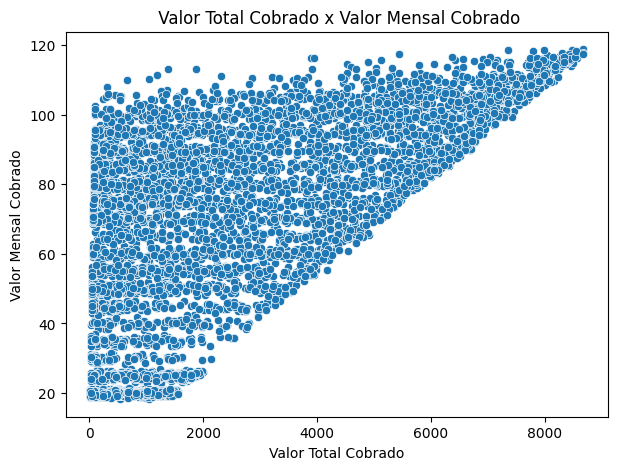

In [44]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='TotalCharges', y='MonthlyCharges', data=df[colunas])
plt.title(" Valor Total Cobrado x Valor Mensal Cobrado")
plt.ylabel("Valor Mensal Cobrado")
plt.xlabel("Valor Total Cobrado")
plt.show()

## Conclusão da Análise

Principais Observações
**Tempo de Permanência (Tenure)**
Clientes com poucos meses de contrato **(mediana de apenas 10 meses entre os que cancelaram)** apresentam maior probabilidade de Churn.

**Valor Total Cobrado (TotalCharges)**
Existe uma forte correlação positiva entre Tenure e TotalCharges — clientes que permanecem mais tempo acumulam maior valor total pago.
Ou seja, retenção de clientes por mais tempo gera receita acumulada mais alta. 

**Gastos Mensais (MonthlyCharges)**
A média e a mediana de MonthlyCharges são mais altas entre os clientes que cancelaram, podendo resultar em maior taxa de cancelamento.

**Parceria (Partner)**
O mapa de calor mostrou que clientes solteiros (sem parceiro) tendem a apresentar taxas de Churn mais altas, independentemente do gênero.
Isso pode sugerir que clientes com vínculos familiares ou conjugais têm maior propensão a manter contratos, seja por pacotes combinados ou dependentes.

**Gênero**
Não houve diferença significativa no Churn entre homens e mulheres, indicando que ações segmentadas por gênero não parecem ser prioritárias, pelo menos isoladamente.